<a href="https://colab.research.google.com/github/Meena-30/Assignments_hamoye/blob/main/Stage_E_Assignment_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536113 sha256=30501c674c2ca519c5c8d65489e9ef3d5ff89cfd53aa24ea38b5ee49f9426fca
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
from fbprophet import Prophet

In [ ]:
df=pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [ ]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
df['FullDate']=pd.to_datetime(df["FullDate"]) #converting FullDate column from object datatype to Date format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [ ]:
#Rename the column names ;FullDate --> ds and ElecPrice --> y
df.rename(columns={"FullDate":"ds","ElecPrice":"y"},inplace=True)

In [ ]:
#Column names are renamed
df.columns

Index(['ds', 'Tmax', 'SysLoad', 'GasPrice', 'y'], dtype='object')

In [ ]:
df.set_index("ds",inplace=True)

In [ ]:
#Resample the Dates to days
dr=df.resample('D').sum()

In [169]:
dr

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [173]:
from statsmodels.tsa.stattools import adfuller
adf_res=adfuller(dr['GasPrice'])
print(f'Adf Statistic:{adf_res[0]}')
print(f'p value :{adf_res[1]}')
print(f'No of lags used:{adf_res[2]}')
print(f'No of observations used:{adf_res[3]}')
print('Critical values:')
for k,b in adf_res[4].items():
  print(f'{k}:{b}')

Adf Statistic:-2.90276669716518
p value :0.04502721288462542
No of lags used:27
No of observations used:3806
Critical values:
1%:-3.4320693157877544
5%:-2.8622996992165364
10%:-2.5671743978048323


In [ ]:
dfi=dr.reset_index()

In [ ]:
dfi

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
df_new=dfi[['ds','y']]

In [192]:
#train and test data
train = df_new[df_new['ds'] < pd.Timestamp('2018-03-20')]
test = df_new[df_new['ds'] >= pd.Timestamp('2018-03-20')]

In [ ]:
print(f"Length of training data:{len(train)}")
print(f"Length of testing data:{len(test)}")

Length of training data:2757
Length of testing data:1077


In [193]:
model=Prophet()
model.fit(train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [194]:
future_df=model.make_future_dataframe(periods=10,freq='D')
forecast=model.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,849.455287,-1366.738459,3165.925611,849.455287,849.455287,143.855508,143.855508,143.855508,159.362662,159.362662,159.362662,-15.507154,-15.507154,-15.507154,0.0,0.0,0.0,993.310795
1,2010-09-02,849.407108,-1410.951842,3389.730017,849.407108,849.407108,224.160554,224.160554,224.160554,257.120465,257.120465,257.120465,-32.959911,-32.959911,-32.959911,0.0,0.0,0.0,1073.567661
2,2010-09-03,849.358928,-1552.958358,3164.244960,849.358928,849.358928,-0.874031,-0.874031,-0.874031,50.276079,50.276079,50.276079,-51.150110,-51.150110,-51.150110,0.0,0.0,0.0,848.484897
3,2010-09-04,849.310749,-1943.266585,2887.215074,849.310749,849.310749,-341.197592,-341.197592,-341.197592,-271.455104,-271.455104,-271.455104,-69.742488,-69.742488,-69.742488,0.0,0.0,0.0,508.113157
4,2010-09-05,849.262569,-1885.463323,2748.876142,849.262569,849.262569,-431.170926,-431.170926,-431.170926,-342.740678,-342.740678,-342.740678,-88.430247,-88.430247,-88.430247,0.0,0.0,0.0,418.091644


In [ ]:
train.tail()

,ds,y
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015
2756,2018-03-19,1998.305


In [ ]:
future_df.tail(11)

,ds
2756,2018-03-19
2757,2018-03-20
2758,2018-03-21
2759,2018-03-22
2760,2018-03-23
2761,2018-03-24
2762,2018-03-25
2763,2018-03-26
2764,2018-03-27
2765,2018-03-28


In [ ]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,993.310795,-1307.418610,3538.329804,849.455287,849.455287,849.455287
1,2010-09-02,1073.567661,-1323.832306,3453.341111,849.407108,849.407108,849.407108
2,2010-09-03,848.484897,-1409.427764,3465.897059,849.358928,849.358928,849.358928
3,2010-09-04,508.113157,-1777.996467,2979.519456,849.310749,849.310749,849.310749
4,2010-09-05,418.091644,-1972.155583,2730.429023,849.262569,849.262569,849.262569
...,...,...,...,...,...,...,...
2762,2018-03-25,2174.521064,-244.316546,4652.400539,2689.957363,2689.957363,2689.957363
2763,2018-03-26,2648.813456,365.427154,5027.182850,2690.749779,2690.749779,2690.749779
2764,2018-03-27,2513.762912,166.265381,4954.027272,2691.542195,2691.542195,2691.542195
2765,2018-03-28,2655.799055,176.061530,5288.064073,2692.334611,2692.334611,2692.334611


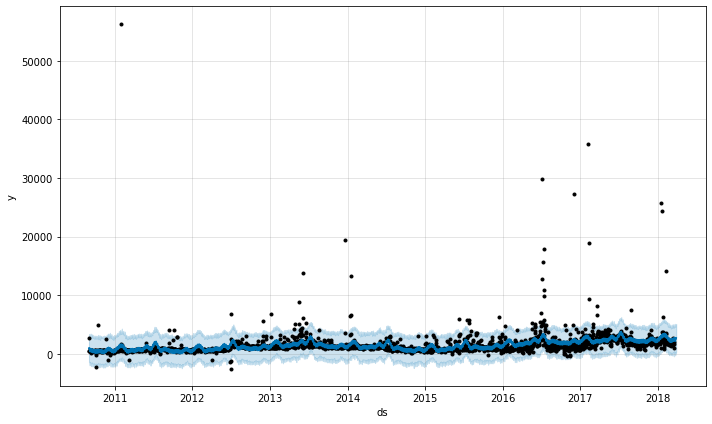

In [195]:
model.plot(forecast)
plt.show()

**Evaluate model**

In [189]:
from statsmodels.tools.eval_measures import rmse 

predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 2797


In [185]:
from fbprophet.diagnostics import cross_validation 
df_cv = cross_validation(model=model,horizon='10 days',period='10 days')

INFO:fbprophet:Making 71 forecasts with cutoffs between 2019-03-21 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/71 [00:00<?, ?it/s]

In [186]:
from fbprophet.diagnostics import cross_validation, performance_metrics 

df_metrics = performance_metrics(df_cv)  # can define window size, e.g. rolling_window=365
df_metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.278058e+06,1130.512284,806.576557,1.177970,0.479419,0.985915
1,2 days,1.862130e+06,1364.598836,1051.446614,9.362129,0.668001,0.985915
2,3 days,6.007537e+06,2451.027684,1137.487568,1.059932,0.560248,0.971831
3,4 days,1.450692e+06,1204.446904,894.826083,5.754111,0.555305,0.985915
4,5 days,4.248810e+06,2061.264097,1123.232654,0.992702,0.587585,0.971831
5,6 days,2.058955e+06,1434.905869,1017.908158,1.612273,0.608644,0.985915
6,7 days,2.056282e+06,1433.974175,1047.290701,1.777152,0.560072,0.985915
7,8 days,2.927467e+06,1710.984332,1170.467707,6.561584,0.654093,0.957746
8,9 days,2.190654e+06,1480.085822,998.322616,1.355506,0.661439,0.971831
9,10 days,2.381632e+06,1543.253660,1049.604407,3.994475,0.588034,0.957746


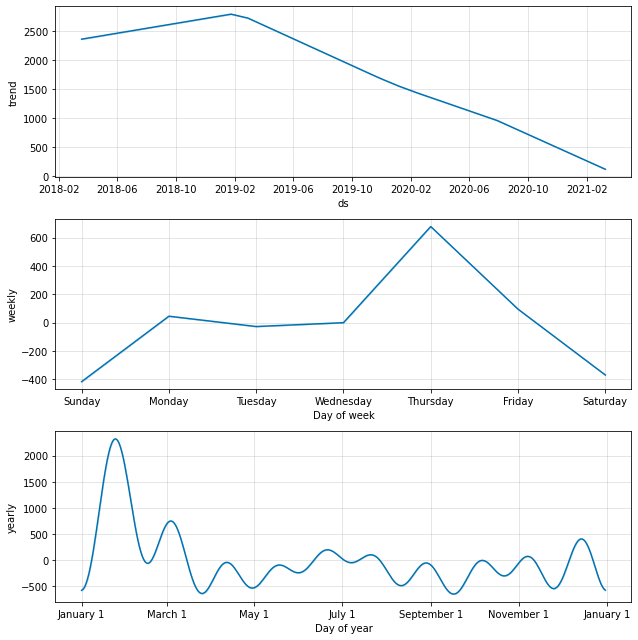

In [191]:
fig = model.plot_components(forecast)

# Multivariate Time Series Forecasting with Facebook Prophet










In [ ]:
dfi.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [133]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        3834 non-null   datetime64[ns]
 1   Tmax      3834 non-null   float64       
 2   SysLoad   3834 non-null   float64       
 3   GasPrice  3834 non-null   float64       
 4   y         3834 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.9 KB


Text(0.5, 0, 'Year')

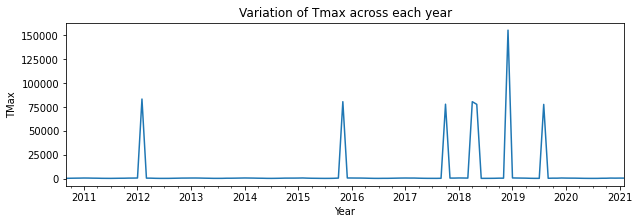

In [124]:
dfi.set_index('ds').resample('M').mean().Tmax.plot(figsize=(10,3))
plt.title('Variation of Tmax across each year')
plt.ylabel('TMax')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

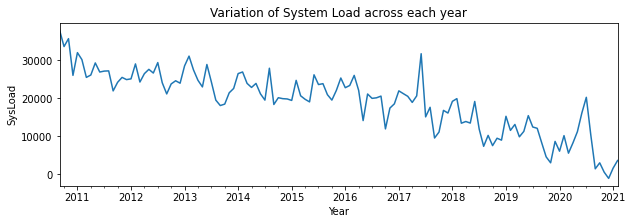

In [126]:
dfi.set_index('ds').resample('M').mean().SysLoad.plot(figsize=(10,3))
plt.title('Variation of System Load across each year')
plt.ylabel('SysLoad')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

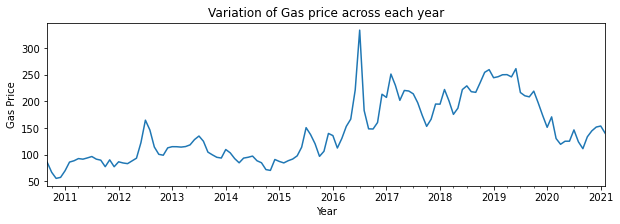

In [127]:
dfi.set_index('ds').resample('M').mean().GasPrice.plot(figsize=(10,3))
plt.title('Variation of Gas price across each year')
plt.ylabel('Gas Price')
plt.xlabel('Year')

In [164]:
dfi

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


Text(0.5, 0, 'Year')

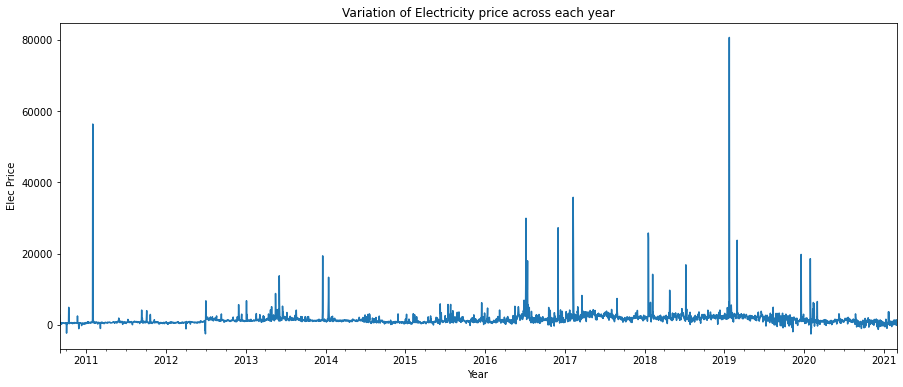

In [168]:
dfi.set_index('ds').resample('D').sum().y.plot(figsize=(15,6))
plt.title('Variation of Electricity price across each year')
plt.ylabel('Elec Price')
plt.xlabel('Year')

In [196]:
df_train=dfi[dfi['ds']<pd.Timestamp('2018-03-20')] #train data
df_test=dfi[dfi['ds']>=pd.Timestamp('2018-03-20')] #test data

In [197]:
df_train

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [198]:
# training the model
mod=Prophet(interval_width=0.9)
mod.add_regressor('Tmax',standardize=False)
mod.add_regressor('SysLoad',standardize=False)
mod.add_regressor('GasPrice',standardize=False)


In [ ]:
mod.predict(df_test)